*SFWR* 4AI3 Artificial Intelligence

Project 1

Date: 2023-11-25

Create a model to calculate the overall winrate of teams and players based on 2023 dataset






In [28]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('./Data/2023.csv')
df.head(20)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,143.0,-322.0,-263.0,-12.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,74.0,357.0,1323.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,136.0,479.0,324.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,142.0,-200.0,-292.0,-20.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,216.0,579.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45521 entries, 0 to 45520
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(94), int64(11), object(18)
memory usage: 42.7+ MB


In [31]:
selected_columns = ['gameid', 'year', 'teamname', 'champion', 'position', 'result', 'playerid']
dataset = df[selected_columns]
dataset.head(40)

,gameid,year,teamname,champion,position,result,playerid
0,ESPORTSTMNT06_2753012,2023,Klanik Esport,Jax,top,1,oe:player:60aff1184bec1d2b2efdae84f5b6e3e
1,ESPORTSTMNT06_2753012,2023,Klanik Esport,Poppy,jng,1,oe:player:fd78e127e45463dcfc2ea3836af0335
2,ESPORTSTMNT06_2753012,2023,Klanik Esport,Taliyah,mid,1,oe:player:baf7147fedeec5de54ca1f240952a3f
3,ESPORTSTMNT06_2753012,2023,Klanik Esport,Ezreal,bot,1,oe:player:8204ca38dc1c42012b5d53131271eb1
4,ESPORTSTMNT06_2753012,2023,Klanik Esport,Karma,sup,1,oe:player:bb97cd2e43cb0855f6485e6f9e93ea2
5,ESPORTSTMNT06_2753012,2023,MS Company,Sejuani,top,0,oe:player:082439970ea1ebc85bde0b2a9ec147a
6,ESPORTSTMNT06_2753012,2023,MS Company,Viego,jng,0,oe:player:ae50e71f31d35aee5c589498e3c1b17
7,ESPORTSTMNT06_2753012,2023,MS Company,Syndra,mid,0,oe:player:79715a2d8a5dcfe07726c00e0f05433
8,ESPORTSTMNT06_2753012,2023,MS Company,Zeri,bot,0,oe:player:0a6393f4da3a7c67232807ef2a0a0d1
9,ESPORTSTMNT06_2753012,2023,MS Company,Yuumi,sup,0,oe:player:451435072a48580d2b9f106c3552370


In [32]:
# Grouping by 'champion' and calculating summary statistics
summary_showtime = dataset.groupby('champion').agg({'result': ['count', 'mean']}).reset_index()

# Renaming columns for clarity
summary_showtime.columns = ['Champion', 'Show Time', 'Win Rate']

# Sorting by 'Show Time' in descending order
summary_showtime = summary_showtime.sort_values(by='Show Time', ascending=False)

print(summary_showtime)

         Champion  Show Time  Win Rate
106       Sejuani       1454  0.489684
133         Varus       1361  0.493020
144        Wukong       1286  0.439347
51        K'Sante       1168  0.487158
138            Vi       1161  0.537468
..            ...        ...       ...
83          Neeko          2  1.000000
57       Katarina          2  0.500000
30   Fiddlesticks          1  0.000000
28        Evelynn          1  1.000000
95          Quinn          1  1.000000

[159 rows x 3 columns]


In [33]:
# Filtering data where 'playerid' is NaN
nan_players_data = df[df['playerid'].isnull()]

# Grouping by 'teamname' and calculating summary statistics
summary_nan_players = nan_players_data.groupby('teamname').agg({'result': ['count', 'mean']}).reset_index()

# Renaming columns for clarity
summary_nan_players.columns = ['Team Name', 'Show Time', 'Win Rate']

# Sorting by 'Show Time' in descending order
summary_nan_players = summary_nan_players.sort_values(by='Show Time', ascending=False)

print(summary_nan_players)

                           Team Name  Show Time  Win Rate
294                   T1 Challengers         48  0.562500
196               Liiv SANDBOX Youth         47  0.340426
195                     Liiv SANDBOX         47  0.510638
132             Gen.G Global Academy         46  0.369565
147  Hanwha Life Esports Challengers         46  0.608696
..                               ...        ...       ...
340            Universitario Esports          3  0.666667
315                       Team Plink          3  0.333333
243                            PEACE          2  0.500000
219                          Miracle          2  0.000000
379                     unknown team          2  0.000000

[381 rows x 3 columns]


In [34]:
# Product the best win rate for different position

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Copy the dataset to avoid SettingWithCopyWarning
dataset_copy = dataset.copy()

# Encoding categorical variables
label_encoder_champion = LabelEncoder()
label_encoder_position = LabelEncoder()

dataset_copy['champion_code'] = label_encoder_champion.fit_transform(dataset_copy['champion'].astype(str))
dataset_copy['position_code'] = label_encoder_position.fit_transform(dataset_copy['position'])

# Dropping rows with NaN values
dataset_copy.dropna(subset=['champion_code', 'position_code', 'result'], inplace=True)

# Training models for each position
positions = ['top', 'jng', 'mid', 'bot', 'sup']
best_champions = {}

for position in positions:
    position_data = dataset_copy[dataset_copy['position'] == position]

    X = position_data[['champion_code']]
    y = position_data['result']

    if len(X['champion_code'].unique()) > 1:  # Ensure there's more than one unique champion code for this position
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))

        # Predicting win rates for champions in this position
        champion_win_rates = {}
        for champion_code in X_test['champion_code'].unique():
            champion_win_rates[label_encoder_champion.inverse_transform([champion_code])[0]] = model.predict(np.array(champion_code).reshape(-1, 1))[0]

        # Selecting champion with the highest predicted win rate
        best_champion = max(champion_win_rates, key=champion_win_rates.get)
        best_champions[position] = best_champion

print("Best champions for each position:")
print(best_champions)

Best champions for each position:
{'top': 'Zeri', 'jng': 'Amumu', 'mid': 'Aatrox', 'bot': 'Ziggs', 'sup': 'Alistar'}


In [35]:
# Product the best win rate for different position

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# ... (The previous code remains the same up to this point)

# Training models for each position
positions = ['top', 'jng', 'mid', 'bot', 'sup']
best_champions = {}
champion_win_rates = {}

for position in positions:
    position_data = dataset_copy[dataset_copy['position'] == position]

    X = position_data[['champion_code']]
    y = position_data['result']

    if len(X['champion_code'].unique()) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))

        champion_win_rates[position] = {}
        for champion_code in X_test['champion_code'].unique():
            champion_name = label_encoder_champion.inverse_transform([champion_code])[0]
            win_rate = model.predict(np.array(champion_code).reshape(-1, 1))[0]
            champion_win_rates[position][champion_name] = win_rate

        best_champion = max(champion_win_rates[position], key=champion_win_rates[position].get)
        best_champions[position] = best_champion

print("Best champions for each position:")
print(best_champions)

print("\nWin rates for best champions:")
for position, champion in best_champions.items():
    win_rate = champion_win_rates[position][champion]
    print(f"{champion} ({position}): {win_rate}")

Best champions for each position:
{'top': 'Zeri', 'jng': 'Amumu', 'mid': 'Aatrox', 'bot': 'Ziggs', 'sup': 'Alistar'}

Win rates for best champions:
Zeri (top): 0.5145987244280603
Amumu (jng): 0.5488303576600412
Aatrox (mid): 0.5097680887100492
Ziggs (bot): 0.5055683020058397
Alistar (sup): 0.5375522239478218


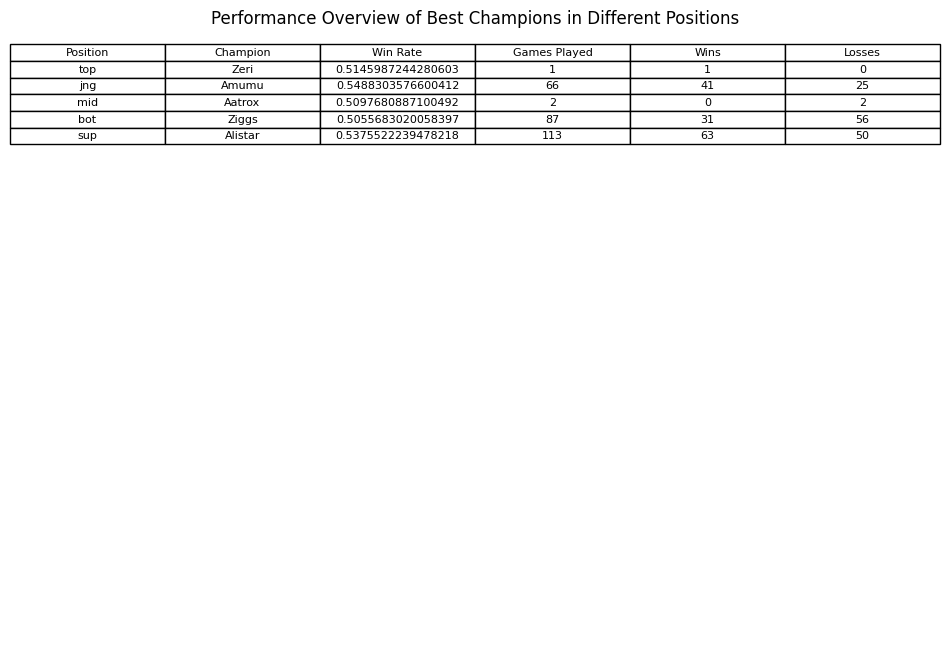

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming champion_win_rates is a dictionary containing win rates for each best champion in different positions
# Assuming dataset_copy is your dataset and contains the necessary information

# Dictionary to store the number of games played by each best champion in different positions
games_played = {}

# Dictionary to store the win and loss counts for each best champion in different positions
win_loss_counts = {}

# Calculating the number of games played by each best champion in different positions
for position, champion in best_champions.items():
    position_data = dataset_copy[(dataset_copy['position'] == position) & (dataset_copy['champion'] == champion)]
    games_played[position] = position_data.shape[0]  # Counting the number of rows (games) for the best champion in each position

    # Counting wins and losses for each best champion in different positions
    win_loss_counts[position] = {
        'Win': position_data['result'].sum(),  # Counting '1' values in 'result' column as wins
        'Loss': len(position_data) - position_data['result'].sum()  # Counting '0' values in 'result' column as losses
    }

# Creating a DataFrame with win rates, games played, wins, and losses
data = {
    'Position': list(best_champions.keys()),
    'Champion': [best_champions[position] for position in best_champions],
    'Win Rate': [champion_win_rates[position][best_champions[position]] for position in best_champions],
    'Games Played': [games_played[position] for position in best_champions],
    'Wins': [win_loss_counts[position]['Win'] for position in best_champions],
    'Losses': [win_loss_counts[position]['Loss'] for position in best_champions]
}

df = pd.DataFrame(data)

# Plotting the table
plt.figure(figsize=(12, 8))
plt.table(cellText=df.values,
          colLabels=df.columns,
          cellLoc='center',
          loc='upper center')

plt.axis('off')  # Hide axis
plt.title('Performance Overview of Best Champions in Different Positions')
plt.show()

False

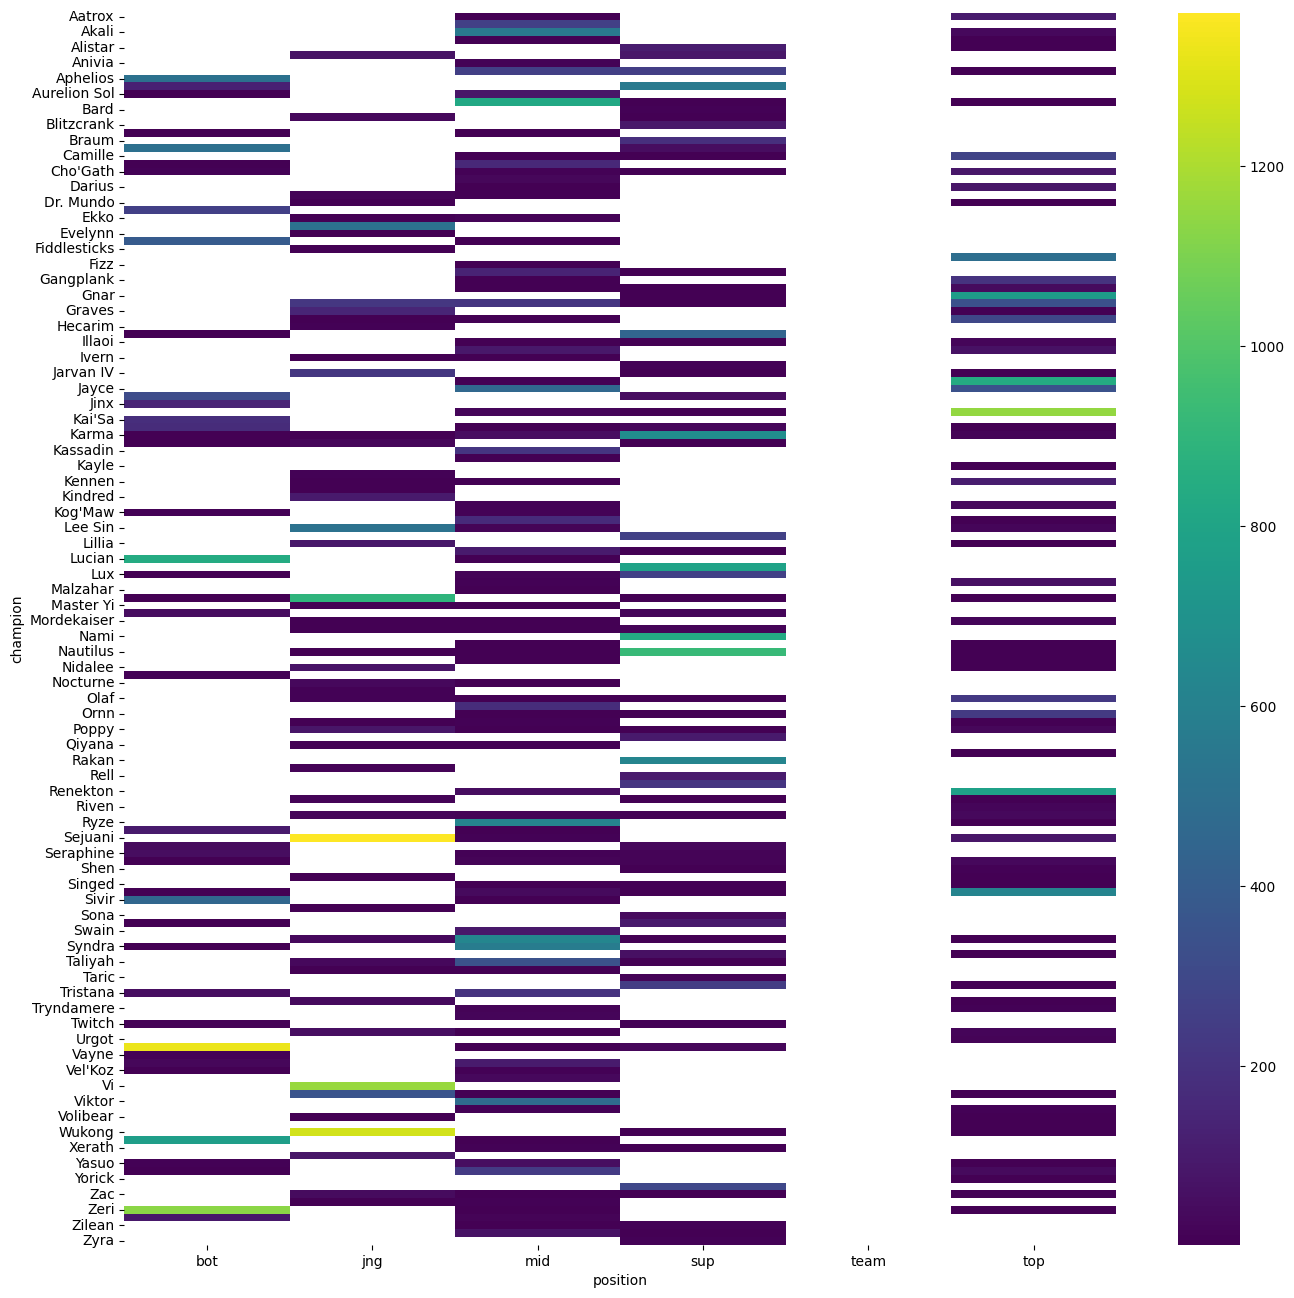

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.subplots(figsize=(16, 16))
df_2dhist = pd.DataFrame({
    x_label: grp['champion'].value_counts()
    for x_label, grp in dataset.groupby('position')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('position') == plt.ylabel('champion')

      champion position  result
0          Jax      top       1
1        Poppy      jng       1
2      Taliyah      mid       1
3       Ezreal      bot       1
4        Karma      sup       1
...        ...      ...     ...
45516     Sion      top       1
45517   Maokai      jng       1
45518    Jayce      mid       1
45519    Xayah      bot       1
45520   Soraka      sup       1

[45521 rows x 3 columns]
       champion_Ahri  champion_Akali  champion_Akshan  champion_Alistar  \
0                  0               0                0                 0   
1                  0               0                0                 0   
2                  0               0                0                 0   
3                  0               0                0                 0   
4                  0               0                0                 0   
...              ...             ...              ...               ...   
45516              0               0                0            

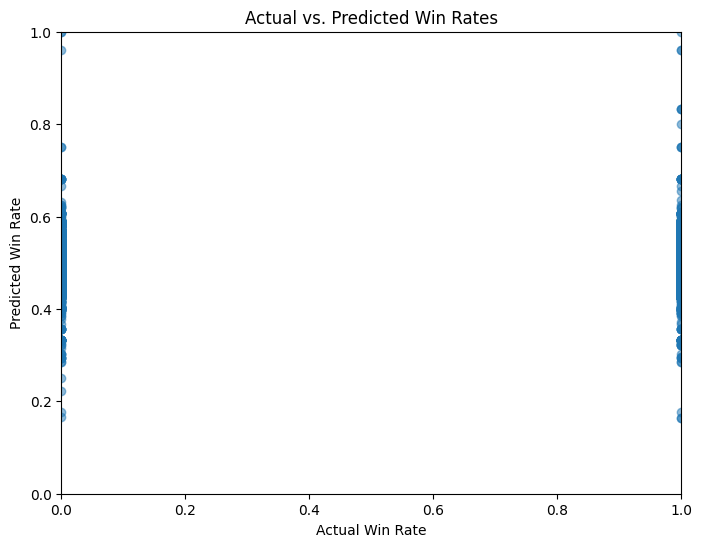

In [38]:
# Linear regression with multiple inputs: to predict 'result' which is win rate from 'champion' and 'position'

# Step 1: Data Preprocessing
selected_columns = ['champion', 'position', 'result']
dataset = dataset[selected_columns]
print(dataset)

# Perform one-hot encoding for categorical variables 'champion', 'position', and 'teamname'
encoded_data = pd.get_dummies(dataset, columns=['champion', 'position'], drop_first=True)

# Features and target variable
X = encoded_data.drop('result', axis=1)  # Features
y = encoded_data['result']  # Target variable

print(X)
print(y)

# Step 2: Linear Regression Model Fitting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Step 3: Visualization
# Plotting the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)  # Plotting the scatter plot with transparency
plt.axis([0, 1, 0, 1])
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.title('Actual vs. Predicted Win Rates')
plt.show()


In [39]:
y_test

38228    0
13153    1
13608    0
44299    0
31506    0
        ..
12757    1
36516    0
40353    0
23597    0
7665     1
Name: result, Length: 9105, dtype: int64

# Linear regression with one variable

In [40]:
# Use seaborn for pairplot.
!pip install -q seaborn
!pip install -q tensorflow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

#dataset.tail(20)
#print(dataset['position'])


2.14.0


In [41]:
# Clean the data
#dataset.isna().sum()
#dataset.tail()

In [42]:
# Drop those rows to keep this initial tutorial simple:
# dataset = dataset.dropna()

In [43]:
#dataset['position'] = dataset['position'].map({1: 'top', 2: 'jng', 3: 'mid', 4: 'bot', 5: 'sup', 6: 'team'})

In [44]:
dataset = pd.get_dummies(dataset, columns=['position'], prefix='', prefix_sep='')
dataset.tail()

,champion,result,bot,jng,mid,sup,team,top
45516,Sion,1,0,0,0,0,0,1
45517,Maokai,1,0,1,0,0,0,0
45518,Jayce,1,0,0,1,0,0,0
45519,Xayah,1,1,0,0,0,0,0
45520,Soraka,1,0,0,0,1,0,0


In [45]:
# Split the data into training and test sets

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_dataset


# Ask for the champion name to check
champion_to_check = input("Enter the champion's name: ")

# Filter train_dataset for the specific champion
filtered_train_dataset = train_dataset[train_dataset['champion'] == champion_to_check]
# Drop 'champion' column from the filtered_train_dataset
filtered_train_dataset = filtered_train_dataset.drop(columns='champion')

# Filter test_dataset for the specific champion
filtered_test_dataset = test_dataset[test_dataset['champion'] == champion_to_check]
# Drop 'champion' column from the filtered_train_dataset
filtered_test_dataset = filtered_test_dataset.drop(columns='champion')

# Display the filtered datasets
print(f"Filtered Train Dataset for {champion_to_check}:")
print(filtered_train_dataset)

print(f"\nFiltered Test Dataset for {champion_to_check}:")
print(filtered_test_dataset)


Enter the champion's name: Fiora
Filtered Train Dataset for Fiora:
       result  bot  jng  mid  sup  team  top
4848        0    0    0    0    0     0    1
26964       0    0    0    0    0     0    1
8220        0    0    0    0    0     0    1
30581       0    0    0    0    0     0    1
1721        1    0    0    0    0     0    1
...       ...  ...  ...  ...  ...   ...  ...
2081        0    0    0    0    0     0    1
35112       0    0    0    0    0     0    1
11357       1    0    0    0    0     0    1
11573       0    0    0    0    0     0    1
2801        1    0    0    0    0     0    1

[388 rows x 7 columns]

Filtered Test Dataset for Fiora:
       result  bot  jng  mid  sup  team  top
41          1    0    0    0    0     0    1
372         0    0    0    0    0     0    1
648         1    0    0    0    0     0    1
677         1    0    0    0    0     0    1
720         1    0    0    0    0     0    1
...       ...  ...  ...  ...  ...   ...  ...
42521       0    0  

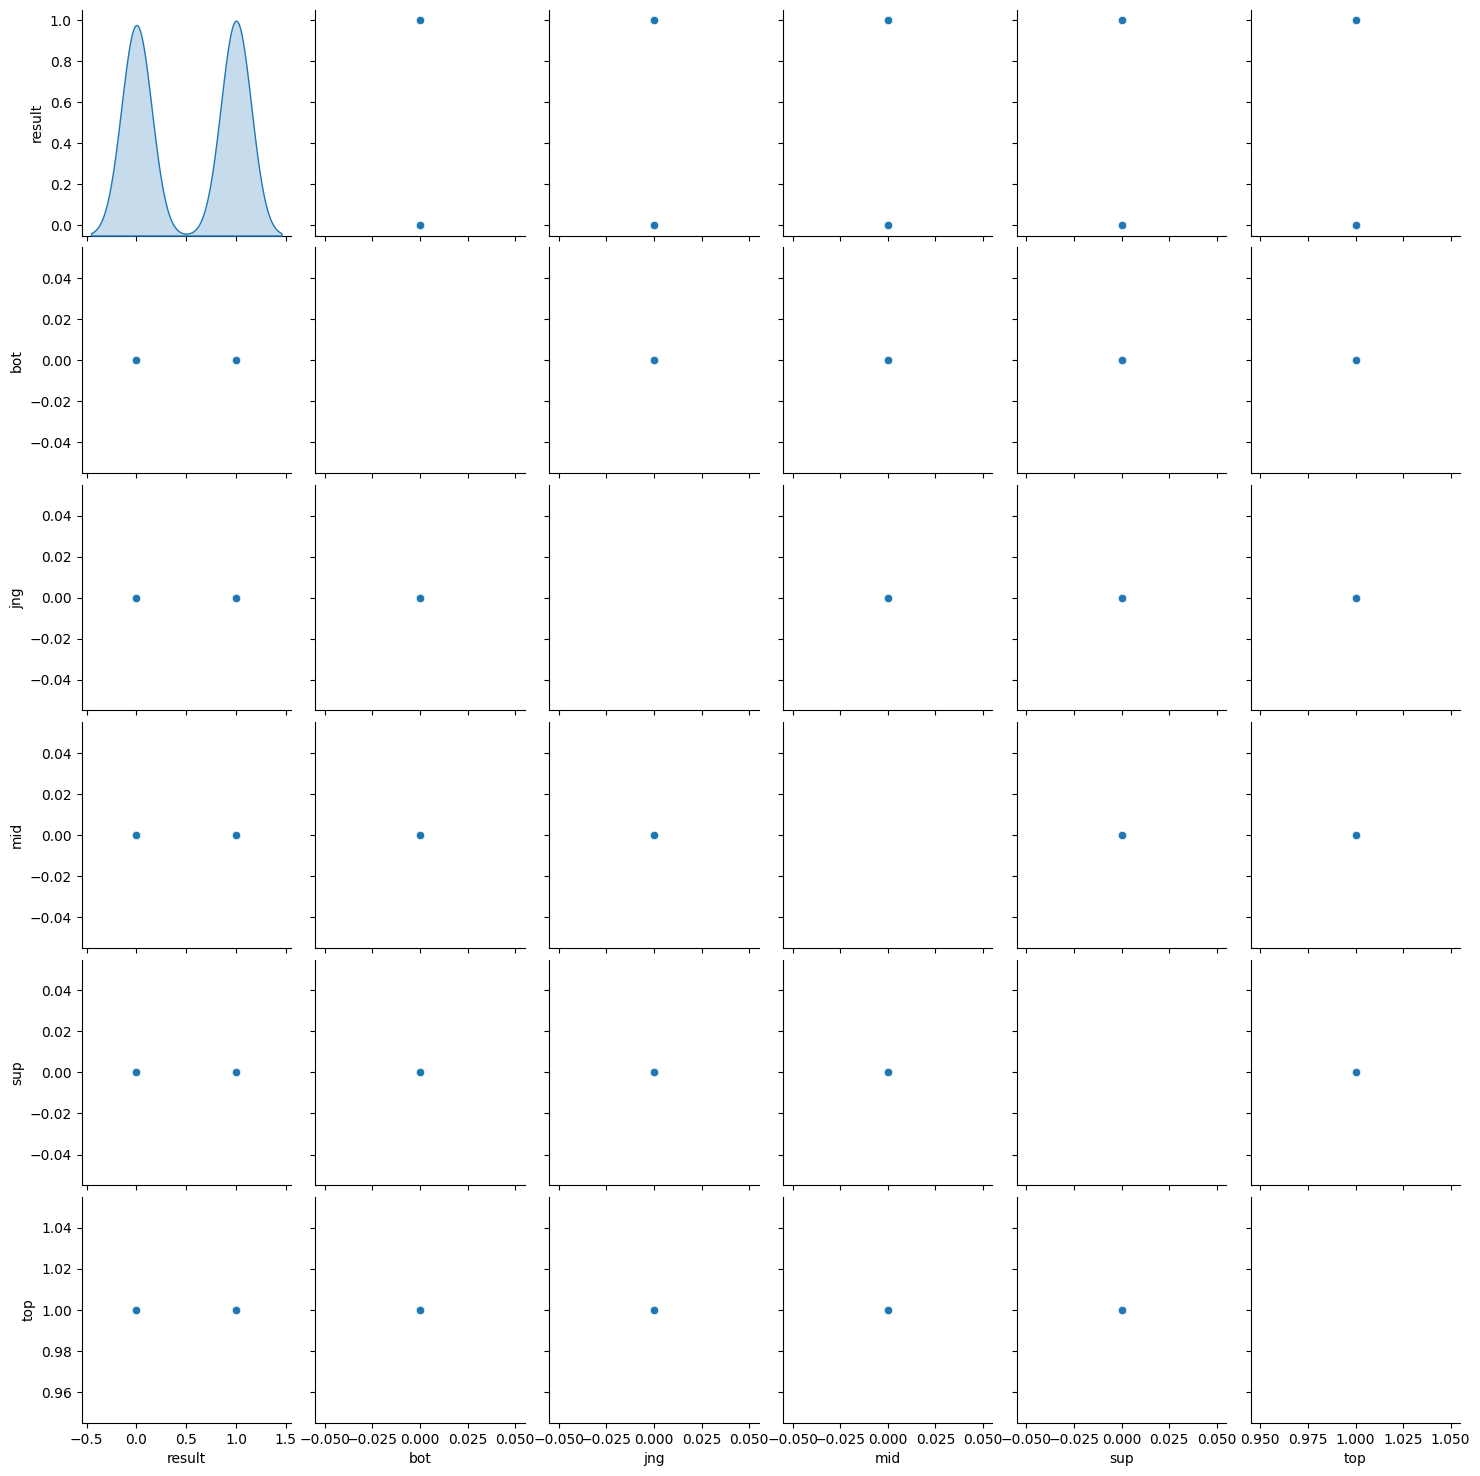

In [46]:
# Inspect the data
sns.pairplot(filtered_train_dataset[['result', 'bot', 'jng', 'mid', 'sup', 'top']], diag_kind='kde')

In [47]:
filtered_train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
result,388.0,0.505155,0.500619,0.0,0.0,1.0,1.0,1.0
bot,388.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
jng,388.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
mid,388.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
sup,388.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
team,388.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
top,388.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [48]:
# Split features from labels
train_features = filtered_train_dataset.copy()
test_features = filtered_test_dataset.copy()

train_labels = train_features.pop('result')
test_labels = test_features.pop('result')

print(train_features)

       bot  jng  mid  sup  team  top
4848     0    0    0    0     0    1
26964    0    0    0    0     0    1
8220     0    0    0    0     0    1
30581    0    0    0    0     0    1
1721     0    0    0    0     0    1
...    ...  ...  ...  ...   ...  ...
2081     0    0    0    0     0    1
35112    0    0    0    0     0    1
11357    0    0    0    0     0    1
11573    0    0    0    0     0    1
2801     0    0    0    0     0    1

[388 rows x 6 columns]


In [49]:
# Normalization
filtered_train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
result,0.505155,0.500619
bot,0.000000,0.000000
jng,0.000000,0.000000
mid,0.000000,0.000000
sup,0.000000,0.000000
team,0.000000,0.000000
top,1.000000,0.000000


In [50]:
train_features.dtypes

bot     uint8
jng     uint8
mid     uint8
sup     uint8
team    uint8
top     uint8
dtype: object

In [51]:
# The Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())



[[0. 0. 0. 0. 0. 1.]]


In [52]:
#print(normalizer.mean.numpy())
print(normalizer.mean.numpy())

[[0. 0. 0. 0. 0. 1.]]


In [53]:
# When the layer is called, it returns the input data, with each feature independently normalized:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[0 0 0 0 0 1]]

Normalized: [[0. 0. 0. 0. 0. 0.]]


In [54]:
# Begin with a single-variable linear regression to predict 'Result' from differnt position.

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [55]:
# When you call Model.predict on a batch of inputs, it produces units=1 outputs for each example:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 162ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [56]:
# When you call the model, its weight matrices will be built—check that the kernel weights (the 𝑚 in 𝑦=𝑚𝑥+𝑏) have a shape of (9, 1):
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[-0.728],
       [-0.841],
       [ 0.545],
       [ 0.57 ],
       [-0.634],
       [-0.365]], dtype=float32)>

In [57]:
# Configure the model with Keras Model.compile and train with Model.fit for 100 epochs: Inline code
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [58]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 7.44 s, sys: 209 ms, total: 7.64 s
Wall time: 21.5 s


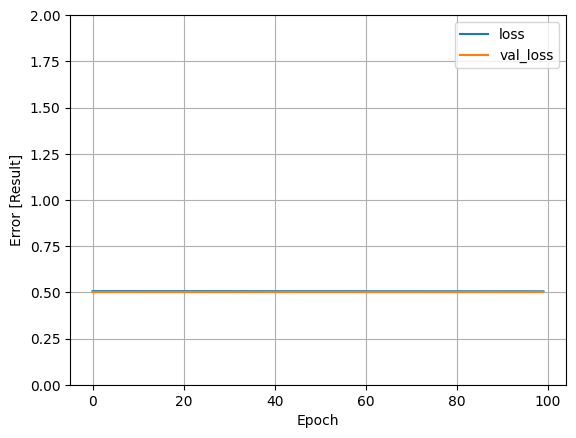

In [71]:
# Using all the inputs in this regression model achieves a much lower training and validation error than the horsepower_model, which had one input:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Result]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [60]:
# collect the results on the test set for later:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# Regression using a DNN and multiple input

In [61]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [62]:
# Create a DNN model with only 'Horsepower' as input and horsepower_normalizer (defined earlier) as the normalization layer:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 64)                448       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [63]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.34 s, sys: 253 ms, total: 6.6 s
Wall time: 6.95 s


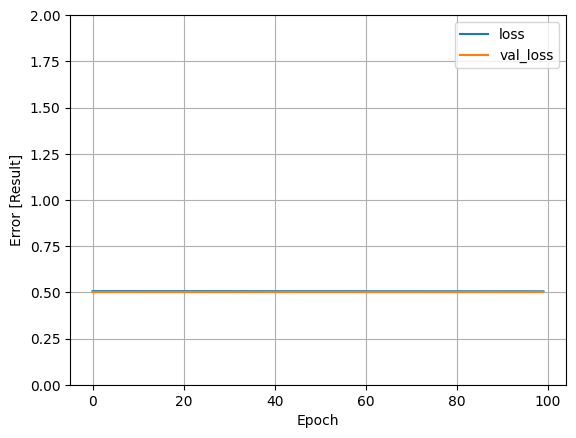

In [76]:
plt.ylim([0, 2])
plot_loss(history)

# Performance

In [65]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,0.5


# Make preditions

4/4 [==============================] - 0s 3ms/step


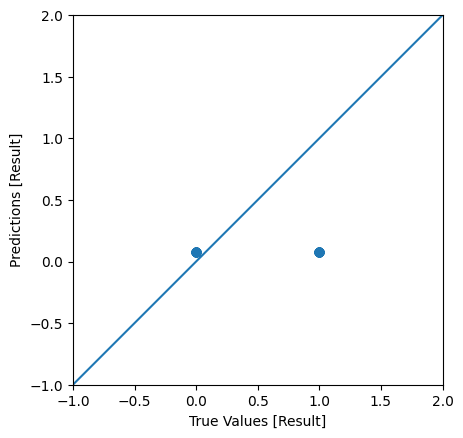

In [66]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Result]')
plt.ylabel('Predictions [Result]')
lims = [-1, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

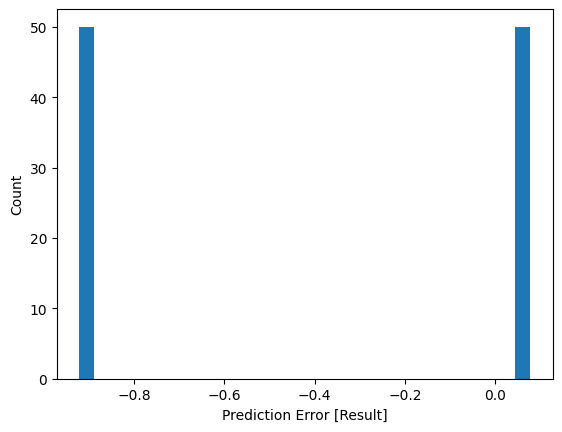

In [67]:
# check the error distribution
error = test_predictions - test_labels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error [Result]')
_ = plt.ylabel('Count')

In [68]:
dnn_model.save('dnn_model')

In [69]:
# If you reload the model, it gives identical output:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [70]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,0.5
reloaded,0.5
